# **EDA (Exploratory Data Analysis)**

## **Package install**

In [ ]:
!pip install -q gdown #to download the initial dataset

## **Imports**

In [ ]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gdown
from sklearn.preprocessing import StandardScaler
from google.colab import drive,files

## **Download using gdown**

In [ ]:
#downloading dataset from Google Drive using file ID
file_id = "1FWFcfnWXX-Sdr2a-H0C46tc4eAH6PKTz"
url = f"https://drive.google.com/uc?id={file_id}"
gdown.download(url,"data.csv",quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1FWFcfnWXX-Sdr2a-H0C46tc4eAH6PKTz
To: /content/data.csv
100%|██████████| 3.11M/3.11M [00:00<00:00, 19.8MB/s]


'data.csv'

## **Loading the dataset**

In [ ]:
# loading dataset into pandas
df = pd.read_csv("data.csv",thousands=',')
print("Initial shape:",df.shape)
print(df.head())

Initial shape: (9999, 9)
                                MOVIES         YEAR  \
0                        Blood Red Sky       (2021)   
1  Masters of the Universe: Revelation     (2021– )   
2                     The Walking Dead  (2010–2022)   
3                       Rick and Morty     (2013– )   
4                      Army of Thieves       (2021)   

                                        GENRE  RATING  \
0      \nAction, Horror, Thriller                 6.1   
1  \nAnimation, Action, Adventure                 5.0   
2       \nDrama, Horror, Thriller                 8.2   
3  \nAnimation, Adventure, Comedy                 9.2   
4         \nAction, Crime, Horror                 NaN   

                                            ONE-LINE  \
0  \nA woman with a mysterious illness is forced ...   
1  \nThe war for Eternia begins again in what may...   
2  \nSheriff Deputy Rick Grimes wakes up from a c...   
3  \nAn animated series that follows the exploits...   
4  \nA prequel, set b

## **clean column names by stripping**

In [ ]:
df.columns = df.columns.str.strip() #Clean column names by stripping whitespace

In [ ]:
print("Columns in dataset:", df.columns.tolist())
print("Initial data shape:", df.shape)

Columns in dataset: ['MOVIES', 'YEAR', 'GENRE', 'RATING', 'ONE-LINE', 'STARS', 'VOTES', 'RunTime', 'Gross']
Initial data shape: (9999, 9)


## **Removal of unwanted columns**

In [ ]:
columns_to_keep = ['YEAR', 'GENRE', 'RATING', 'VOTES', 'RunTime', 'Gross'] #this remove the useless columns
df = df[columns_to_keep + [col for col in df.columns if col not in columns_to_keep]]

## **Drop exact duplicate columns if they exist**

In [ ]:
df = df.loc[:,~df.columns.duplicated()]
print("\nAfter dropping unnecessary & duplicate columns:", df.shape) #removes any duplicate columns if it exists

NameError: name 'df' is not defined

## **Clean Year column**

In [ ]:
# Extract the first 4-digit year from each value in the 'YEAR' column using regex
def extract_year(year_str):
    if pd.isna(year_str):
        return np.nan
    match = re.search(r'\d{4}', str(year_str))
    return int(match.group()) if match else np.nan
df['YEAR'] = df['YEAR'].apply(extract_year)

## **Split and Clean the Genre column**

In [ ]:
df['GENRE'] = df['GENRE'].str.split(',')
df['GENRE'] = df['GENRE'].apply(lambda genres: [g.strip() for g in genres] if isinstance(genres, list) else []) # this is in order to differentiate by genre

## **Convert to numeric formats**

In [ ]:
df['RATING'] = pd.to_numeric(df['RATING'],errors='coerce') #default is float
df['VOTES'] = pd.to_numeric(df['VOTES'].astype(str).str.replace(',', ''),errors='coerce',downcast='integer')
df['RunTime'] = pd.to_numeric(df['RunTime'],errors='coerce',downcast='integer')
df['Gross'] = pd.to_numeric(df['Gross'].astype(str).str.replace('[^\d.]', '', regex=True), errors='coerce')

## **Drop rows with critical missing values**

In [ ]:
df = df.dropna(subset=['RATING', 'VOTES', 'RunTime', 'YEAR', 'Gross'])
print("Shape after cleaning:", df.shape) #dropping null/0/nan rows as they are insignificant

Shape after cleaning: (460, 9)


## **Exploding Genre column**

In [ ]:
df_exploded = df.explode('GENRE').reset_index(drop=True) #Splits each list in the 'GENRE' column into separate rows, so each genre gets its own row, and resets the index.

## **Visualisation**

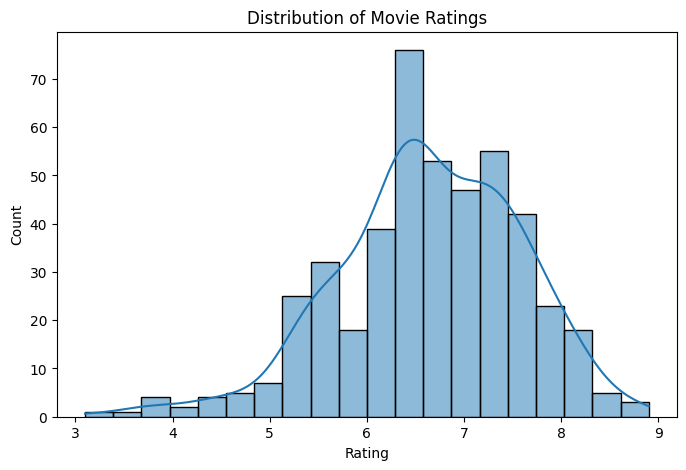

In [ ]:
#Histogram: Movie Ratings
plt.figure(figsize=(8,5))
sns.histplot(df['RATING'],bins=20,kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

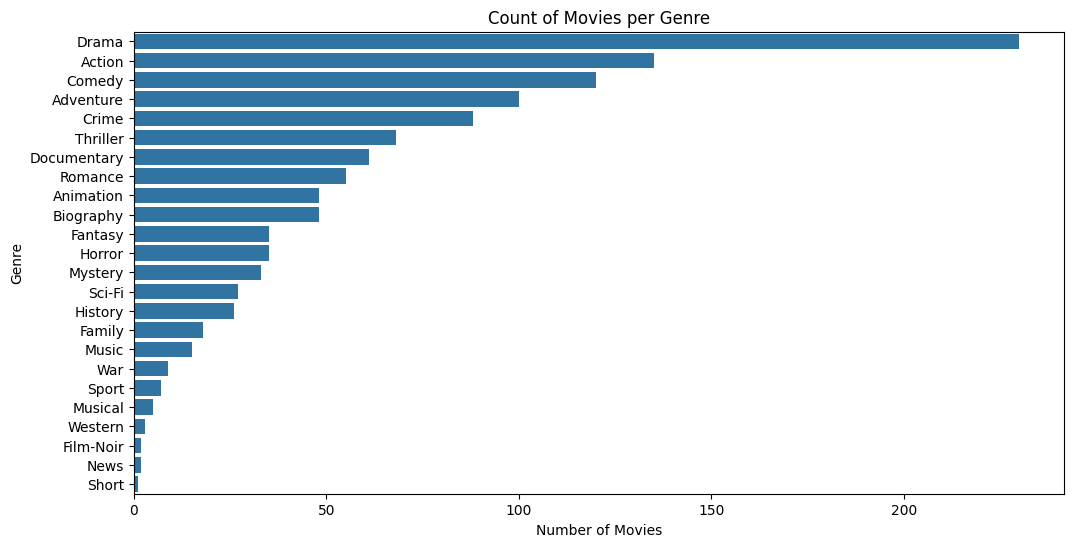

In [ ]:
#Countplot: Movies per Genre
plt.figure(figsize=(12,6))
sns.countplot(data=df_exploded,y='GENRE',order=df_exploded['GENRE'].value_counts().index)
plt.title('Count of Movies per Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

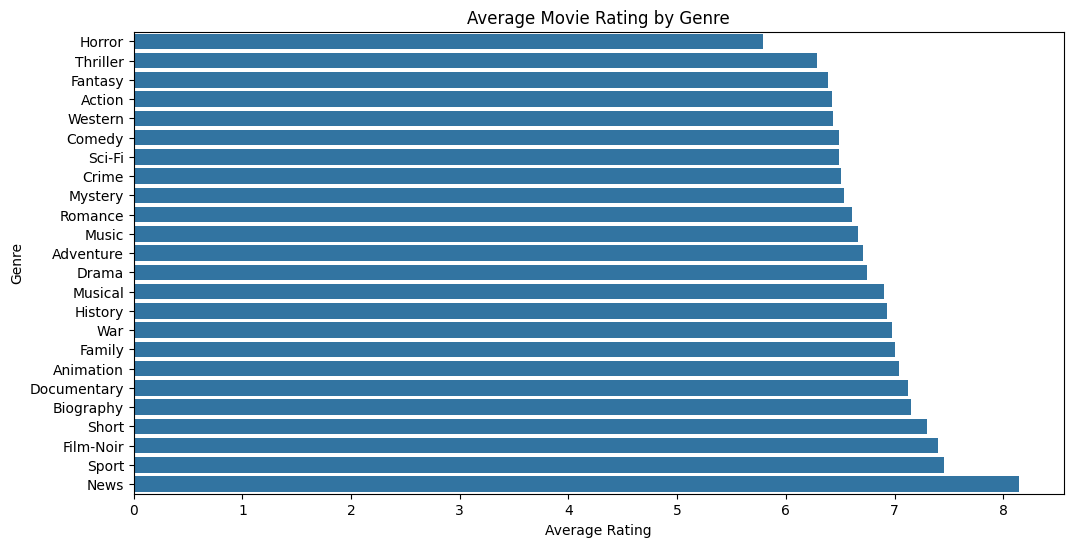

In [ ]:
#Barplot: Average Rating by Genre
plt.figure(figsize=(12,6))
avg_rating = df_exploded.groupby('GENRE')['RATING'].mean().sort_values()
sns.barplot(x=avg_rating.values,y=avg_rating.index)
plt.title('Average Movie Rating by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

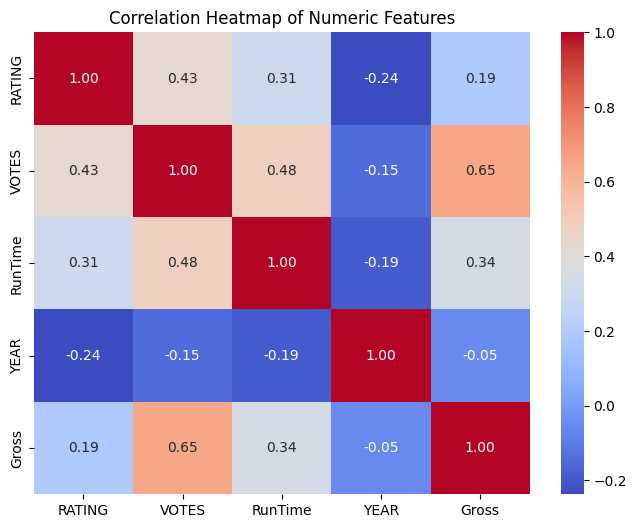

In [ ]:
#Heatmap of numeric features
plt.figure(figsize=(8,6))
sns.heatmap(df[['RATING','VOTES','RunTime','YEAR','Gross']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

## **Gross profit Visualisation**

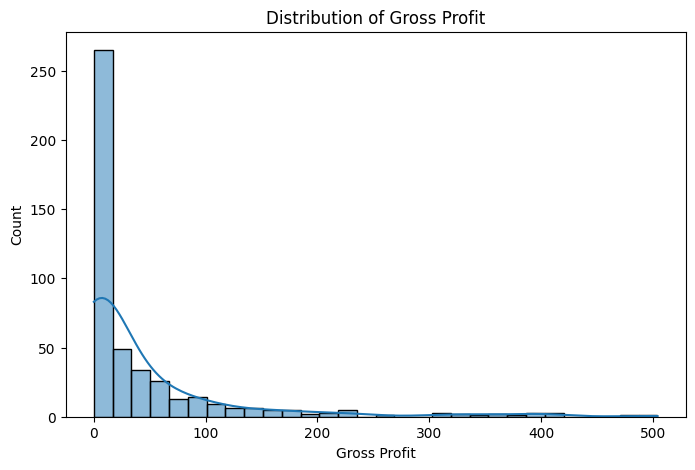

In [ ]:
#Histogram: Gross Profit
plt.figure(figsize=(8,5))
sns.histplot(df['Gross'],bins=30,kde=True)
plt.title('Distribution of Gross Profit')
plt.xlabel('Gross Profit')
plt.ylabel('Count')
plt.show()

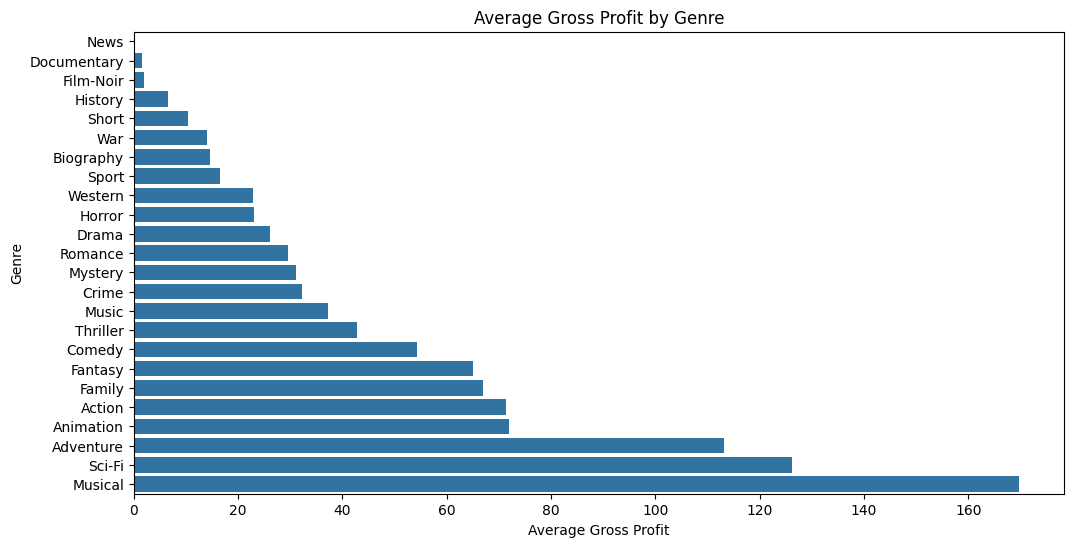

In [ ]:
#Barplot: Average Gross by Genre
plt.figure(figsize=(12,6))
avg_gross = df_exploded.groupby('GENRE')['Gross'].mean().sort_values()
sns.barplot(x=avg_gross.values,y=avg_gross.index)
plt.title('Average Gross Profit by Genre')
plt.xlabel('Average Gross Profit')
plt.ylabel('Genre')
plt.show()

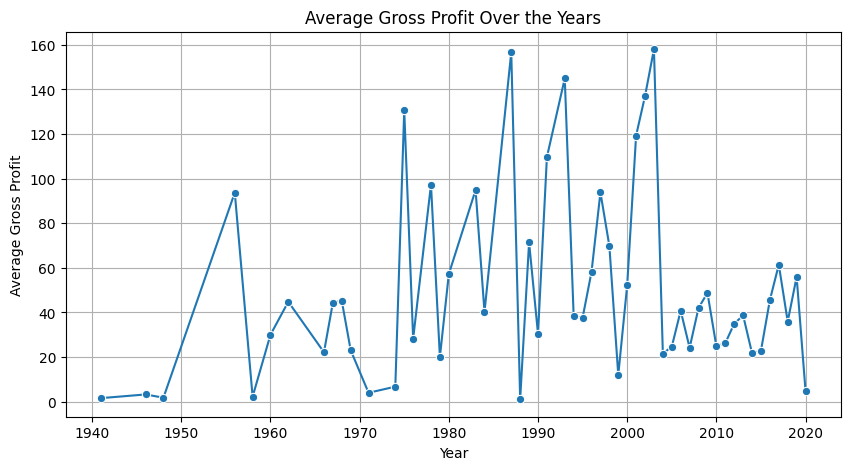

In [ ]:
#Lineplot: Average Gross Over the Years
gross_by_year = df.groupby('YEAR')['Gross'].mean().dropna()
plt.figure(figsize=(10,5))
sns.lineplot(x=gross_by_year.index,y=gross_by_year.values,marker='o')
plt.title('Average Gross Profit Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Gross Profit')
plt.grid(True)
plt.show()

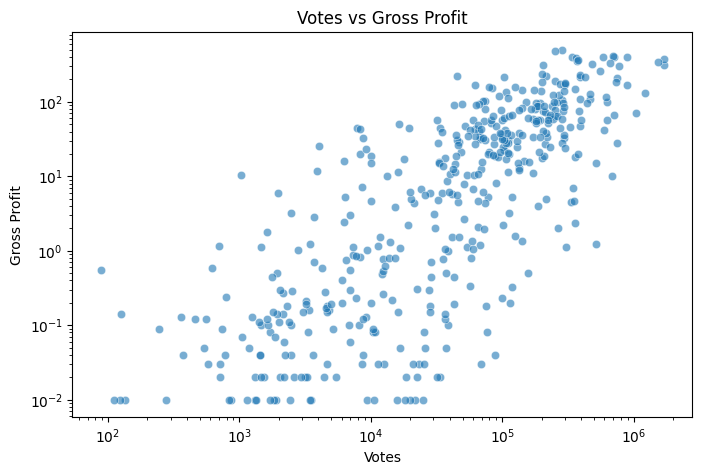

In [ ]:
#Scatterplot: Votes vs Gross
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='VOTES', y='Gross', alpha=0.6)
plt.title('Votes vs Gross Profit')
plt.xlabel('Votes')
plt.ylabel('Gross Profit')
plt.xscale('log')  # Optional for better scale visibility
plt.yscale('log')
plt.show()

## **Download of cleaned dataset**

In [ ]:
# Remove completely empty rows (all NaNs or empty strings)
df = df.dropna(how='all')  # drop rows where all elements are NaN
# Remove rows where all values are empty strings or whitespace
df = df[~df.apply(lambda row: all(str(cell).strip() == '' for cell in row), axis=1)]
# Optionally remove rows with suspicious characters (e.g., '*') in any column
df = df[~df.apply(lambda row: row.astype(str).str.contains(r'^\*+$').any(), axis=1)]
cleaned_file = 'cleaned_data.csv'
df.to_csv(cleaned_file, index=False)
# Download the file to your local machine
files.download(cleaned_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>